In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
feature_df = pd.read_csv('feature_df.csv')

In [3]:
feature_df.isnull().sum()

Unnamed: 0              0
id                      0
qid1                    0
qid2                    0
Clean_q1_lem            0
Clean_q2_lem            0
is_duplicate            0
q1_len                  0
q2_len                  0
q1_num_words            0
q2_num_words            0
word_common             0
word_total              0
word_share              0
cwc_min                 0
cwc_max                 0
csc_min                 0
csc_max                 0
ctc_min                 0
ctc_max                 0
last_word_eq            0
first_word_eq           0
abs_len_diff            0
mean_len                0
longest_substr_ratio    0
fuzz_ratio              0
fuzz_partial_ratio      0
token_sort_ratio        0
token_set_ratio         0
dtype: int64

In [4]:
final_df = feature_df.drop(columns=['Unnamed: 0','id','qid1','qid2','Clean_q1_lem','Clean_q2_lem'])
print(final_df.shape)
final_df.head()

(3000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,1,75,76,13,13,12,26,0.46,0.874989,0.874989,...,0.916659,1,1,0,12.0,0.844156,99,99,99,99
1,0,48,56,13,16,8,24,0.33,0.833319,0.714276,...,0.466664,1,1,3,13.5,0.220000,69,67,65,74
2,0,104,119,28,21,4,38,0.11,0.000000,0.000000,...,0.080000,0,0,8,21.0,0.047170,26,28,34,43
3,0,58,145,14,32,1,34,0.03,0.000000,0.000000,...,0.000000,0,0,18,21.0,0.050000,29,37,23,30
4,0,34,49,5,9,3,13,0.23,0.749981,0.499992,...,0.333330,1,0,4,7.0,0.555556,55,71,48,69


In [5]:
final_df.isnull().sum()

is_duplicate            0
q1_len                  0
q2_len                  0
q1_num_words            0
q2_num_words            0
word_common             0
word_total              0
word_share              0
cwc_min                 0
cwc_max                 0
csc_min                 0
csc_max                 0
ctc_min                 0
ctc_max                 0
last_word_eq            0
first_word_eq           0
abs_len_diff            0
mean_len                0
longest_substr_ratio    0
fuzz_ratio              0
fuzz_partial_ratio      0
token_sort_ratio        0
token_set_ratio         0
dtype: int64

In [6]:
ques_df = feature_df[['Clean_q1_lem','Clean_q2_lem']]
ques_df.head()

,Clean_q1_lem,Clean_q2_lem
0,what is the best marketing automation tool for...,what is the best marketing automation tool for...
1,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...
2,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...
3,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...
4,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy


In [7]:
ques_df_bow=ques_df

In [8]:
ques_df_tfidf=ques_df

In [9]:
ques_df_w2v=ques_df

In [10]:
ques_df_glove=ques_df

In [11]:
ques_df_bert=ques_df

In [12]:
questions= ques_df['Clean_q1_lem']+ques_df['Clean_q2_lem']

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['Clean_q1_lem']) + list(ques_df['Clean_q2_lem'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [14]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(3000, 6000)

In [15]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(3000, 6023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,1,75,76,13,13,12,26,0.46,0.874989,0.874989,...,0,0,0,0,0,0,0,0,0,0
1,0,48,56,13,16,8,24,0.33,0.833319,0.714276,...,0,0,0,0,0,0,0,0,0,0
2,0,104,119,28,21,4,38,0.11,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,0,58,145,14,32,1,34,0.03,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0
4,0,34,49,5,9,3,13,0.23,0.749981,0.499992,...,0,0,0,0,0,0,0,0,0,0


In [16]:
final_df_bow=final_df

In [17]:
final_df_tfidf=final_df

In [18]:
final_df_w2v=final_df

In [19]:
final_df_glove=final_df

In [20]:
final_df_bert=final_df

# **Data Preparation - Split the data into train and test set**

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [22]:
X_train

array([[59., 60.,  9., ...,  0.,  0.,  0.],
       [56., 61.,  8., ...,  0.,  0.,  0.],
       [83., 44., 14., ...,  0.,  0.,  0.],
       ...,
       [46., 29.,  9., ...,  0.,  0.,  0.],
       [52., 46., 10., ...,  0.,  0.,  0.],
       [50., 50., 10., ...,  0.,  0.,  0.]])

In [23]:
X_test

array([[ 36.,  45.,   7., ...,   0.,   0.,   0.],
       [ 88.,  38.,  21., ...,   0.,   0.,   0.],
       [ 73., 221.,  12., ...,   0.,   0.,   0.],
       ...,
       [ 67.,  64.,  14., ...,   0.,   0.,   0.],
       [ 73.,  91.,  12., ...,   0.,   0.,   0.],
       [ 92., 130.,  19., ...,   0.,   0.,   0.]])

# ML-FLow

In [24]:
!pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import mlflow

In [26]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")

In [27]:
mlflow.set_experiment("Quora Question Pair Similarity")

<Experiment: artifact_location='./mlruns/1', creation_time=1666876736882, experiment_id='1', last_update_time=1666876736882, lifecycle_stage='active', name='Quora Question Pair Similarity', tags={}>

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7166666666666667

In [30]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7116666666666667

In [42]:
from sklearn.metrics import confusion_matrix

In [33]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[305,  80],
       [ 98, 117]])

In [34]:
# for random forest model
confusion_matrix(y_test,y_pred1)

array([[284, 101],
       [ 72, 143]])

In [35]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [36]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [37]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [38]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [39]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [40]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1,'lem')
    q2 = preprocess(q2,'lem')
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [41]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [42]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
# Downloading wordnet before applying Lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [43]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [44]:
## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

In [45]:
def preprocess(q, flag):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        q = stemmer.stem(q)
    else:
        q = lemmatizer.lemmatize(q)
        
    return q
    # tokenize into words
    #tokens = q.split()
    
    # remove stop words                
    #clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    

    # Stemming/Lemmatization
    #if(flag == 'stem'):
        #clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    #else:
        #clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]

    #q=' '.join([" ".join(clean_tokens)])
    #return q

In [46]:
import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [47]:
!pip install distance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
import distance

In [49]:
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
rf.predict(query_point_creator(q1,q4))

array([1])

In [51]:
cv

CountVectorizer(max_features=3000)

In [52]:
import pickle

pickle.dump(rf,open('Model_new/model.pkl','wb'))
pickle.dump(cv,open('Model_new/cv.pkl','wb'))

# Tracking-Experiment-Logistic_regression

In [53]:
from sklearn import metrics

In [54]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Team7")
    mlflow.set_tag("algo", "Logit")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    C = 0.1
    mlflow.log_param("C", C)
    lr_classifier_bow = LogisticRegression(C=C)
    lr_classifier_bow.fit(X_train, y_train)
    y_pred = lr_classifier_bow.predict(X_test)
   
    acc = metrics.accuracy_score(y_test, y_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(lr_classifier_bow, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/cv.pkl")

# Tracking-Experiment - Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
with mlflow.start_run():
    mlflow.set_tag("dev", "Team7")
    mlflow.set_tag("algo", "rf_bow")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    
    rf_bow = RandomForestClassifier()
    rf_bow.fit(X_train,y_train)
    y_pred = rf_bow.predict(X_test)
    accuracy_score(y_test,y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(rf_bow, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/cv.pkl")

# Tracking -Experiment -SVM

In [56]:
from sklearn.svm import SVC

In [57]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Team7")
    mlflow.set_tag("algo", "SVM_bow")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    C = 0.1
    mlflow.log_param("C", C)
    sv_classifier_bow = SVC(C=C)
    sv_classifier_bow.fit(X_train, y_train)
    y_pred = sv_classifier_bow.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(sv_classifier_bow, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/cv.pkl")

# TF-IDF

In [58]:
ques_df.head()

,Clean_q1_lem,Clean_q2_lem
0,what is the best marketing automation tool for...,what is the best marketing automation tool for...
1,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...
2,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...
3,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...
4,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy


In [59]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,1,75,76,13,13,12,26,0.46,0.874989,0.874989,...,0,0,0,0,0,0,0,0,0,0
1,0,48,56,13,16,8,24,0.33,0.833319,0.714276,...,0,0,0,0,0,0,0,0,0,0
2,0,104,119,28,21,4,38,0.11,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,0,58,145,14,32,1,34,0.03,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0
4,0,34,49,5,9,3,13,0.23,0.749981,0.499992,...,0,0,0,0,0,0,0,0,0,0


In [60]:
questions = list(ques_df['Clean_q1_lem']) + list(ques_df['Clean_q2_lem'])

In [26]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

dtm = vectorizer.fit_transform(questions)

In [62]:
q1_arr, q2_arr = np.vsplit(vectorizer.fit_transform(questions).toarray(),2)

In [63]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(3000, 15576)

In [64]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(3000, 21599)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,7778,7779,7780,7781,7782,7783,7784,7785,7786,7787
0,1,75,76,13,13,12,26,0.46,0.874989,0.874989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,48,56,13,16,8,24,0.33,0.833319,0.714276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,104,119,28,21,4,38,0.11,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,58,145,14,32,1,34,0.03,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,34,49,5,9,3,13,0.23,0.749981,0.499992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [66]:
pickle.dump(vectorizer,open('Model_new/vectorizer.pkl','wb'))

In [67]:
pd.DataFrame(dtm.toarray(), columns=sorted(vectorizer.vocabulary_))

,000,000rs,00am,01,03,10,100,100k,10k,10th,...,zurich,このたびはご愁傷さまでございます,不好意思,可以,啪啪啪啪,太好了vs,好萌阿,很好,港澳居民來往內地通行證,那年那兔那些事儿
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Experiment Tracking for TFIDF Logistic Regression

In [68]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Team7")
    mlflow.set_tag("algo", "Logit_tfidf")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    C = 0.1
    mlflow.log_param("C", C)
    lr_classifier_tfidf = LogisticRegression(C=C)
    lr_classifier_tfidf.fit(X_train, y_train)
    y_pred = lr_classifier_tfidf.predict(X_test)
   
    acc = metrics.accuracy_score(y_test, y_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(lr_classifier_tfidf, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/vectorizer.pkl")

# Experiment Tracking for TFIDF Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
with mlflow.start_run():
    mlflow.set_tag("dev", "Team7")
    mlflow.set_tag("algo", "rf_tfidf")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    
    rf_tfidf = RandomForestClassifier()
    rf_tfidf.fit(X_train,y_train)
    y_pred = rf_tfidf.predict(X_test)
    accuracy_score(y_test,y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(rf_tfidf, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/vectorizer.pkl")

# Experiment Tracking for TFIDF SVM

In [70]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Team7")
    mlflow.set_tag("algo", "SVM_tfidf")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    C = 0.1
    mlflow.log_param("C", C)
    sv_classifier_tfidf = SVC(C=C)
    sv_classifier_tfidf.fit(X_train, y_train)
    y_pred = sv_classifier_tfidf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(sv_classifier_tfidf, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/vectorizer.pkl")

# Word2Vec

In [49]:
! pip install gensim
! pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import gensim

print(gensim.__version__)

4.2.0


In [51]:
from gensim.models import Word2Vec

In [52]:
ques_df

,Clean_q1_lem,Clean_q2_lem
0,what is the best marketing automation tool for...,what is the best marketing automation tool for...
1,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...
2,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...
3,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...
4,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy
...,...,...
2995,what is codeblocks all about,why codeblocks is not recognizing include
2996,how does ito integral represent a brownian motion,why are ito integrals important
2997,when can i get ignou mark sheet,does address of senior citizen customer on e t...
2998,would i get into uc berkeley please see the ...,what does it take to get into uc berkeley


In [53]:
questions = list(ques_df['Clean_q1_lem']) + list(ques_df['Clean_q2_lem'])
isduplicate=list(final_df['is_duplicate'])+list(final_df['is_duplicate'])

In [54]:
questions=pd.DataFrame(questions)
isdup=pd.DataFrame(isduplicate)

In [55]:
questions.columns=['questions']

In [56]:
questions['questions']

0       what is the best marketing automation tool for...
1        i am poor but i want to invest  what should i do
2       i am from india and live abroad  i met a guy f...
3       why do so many people in the u s  hate the sou...
4                      consequences of bhopal gas tragedy
                              ...                        
5995           why codeblocks is not recognizing  include
5996                      why are ito integrals important
5997    does address of senior citizen customer on e t...
5998            what does it take to get into uc berkeley
5999    which one out of samsung galaxy s7 and iphone ...
Name: questions, Length: 6000, dtype: object

In [57]:
isdup

,0
0,1
1,0
2,0
3,0
4,0
...,...
5995,0
5996,0
5997,0
5998,0


In [58]:
questions['questions'] = questions['questions'].apply(lambda sent : sent.split())

questions.head()

,questions
0,"[what, is, the, best, marketing, automation, t..."
1,"[i, am, poor, but, i, want, to, invest, what, ..."
2,"[i, am, from, india, and, live, abroad, i, met..."
3,"[why, do, so, many, people, in, the, u, s, hat..."
4,"[consequences, of, bhopal, gas, tragedy]"


In [59]:
model_w2v = Word2Vec(list(questions['questions']), vector_size=100, min_count=1)

In [60]:
def document_vector(doc, keyed_vectors):
    """Remove out-of-vocabulary words. Create document vectors by averaging word vectors."""
    vocab_tokens = [word for word in doc if word in keyed_vectors.index_to_key]
    return np.mean(keyed_vectors.__getitem__(vocab_tokens), axis=0)

In [61]:
questions['doc_vector'] = questions.questions.apply(lambda x : document_vector(x, model_w2v.wv))

In [62]:
questions['doc_vector']

0       [-0.1976944, 0.2120373, 0.10369011, 0.2056852,...
1       [-0.32076052, 0.3015083, 0.15483676, 0.1427460...
2       [-0.31028858, 0.29883224, 0.15648407, 0.156790...
3       [-0.2777413, 0.27682617, 0.14709856, 0.2141443...
4       [-0.10393232, 0.10356728, 0.050845433, 0.09794...
                              ...                        
5995    [-0.20430398, 0.20811945, 0.10289956, 0.147980...
5996    [-0.16764084, 0.17598873, 0.09314509, 0.147352...
5997    [-0.17785019, 0.17740642, 0.087483115, 0.15804...
5998    [-0.2625798, 0.26137075, 0.1391399, 0.18833597...
5999    [-0.20426063, 0.211824, 0.10280662, 0.17742787...
Name: doc_vector, Length: 6000, dtype: object

In [63]:
X_train_w2v = list(questions['doc_vector'])

In [64]:
#questionsw['is_duplicate']=pd.cocafinal_df['is_duplicate']
questions.insert(1, "is_duplicate", isdup , True)

In [65]:
questions.isnull().sum()

questions       0
is_duplicate    0
doc_vector      0
dtype: int64

In [66]:
questions['doc_vector']

0       [-0.1976944, 0.2120373, 0.10369011, 0.2056852,...
1       [-0.32076052, 0.3015083, 0.15483676, 0.1427460...
2       [-0.31028858, 0.29883224, 0.15648407, 0.156790...
3       [-0.2777413, 0.27682617, 0.14709856, 0.2141443...
4       [-0.10393232, 0.10356728, 0.050845433, 0.09794...
                              ...                        
5995    [-0.20430398, 0.20811945, 0.10289956, 0.147980...
5996    [-0.16764084, 0.17598873, 0.09314509, 0.147352...
5997    [-0.17785019, 0.17740642, 0.087483115, 0.15804...
5998    [-0.2625798, 0.26137075, 0.1391399, 0.18833597...
5999    [-0.20426063, 0.211824, 0.10280662, 0.17742787...
Name: doc_vector, Length: 6000, dtype: object

In [68]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(questions['doc_vector'],isdup,test_size=0.2,random_state=1)

In [69]:
X_train=pd.DataFrame(X_train)

In [70]:

X_train

,doc_vector
1352,"[-0.17059968, 0.17464532, 0.09063046, 0.107435..."
2256,"[-0.2610119, 0.27351716, 0.1315965, 0.2957358,..."
4495,"[-0.2253571, 0.2528593, 0.116390586, 0.2785444..."
5390,"[-0.23040596, 0.23998527, 0.12030766, 0.218086..."
4945,"[-0.16580643, 0.16520923, 0.08440841, 0.109869..."
...,...
905,"[-0.1845098, 0.19148211, 0.09547546, 0.1582037..."
5192,"[-0.2389791, 0.2552301, 0.11890667, 0.26915717..."
3980,"[-0.24887276, 0.23801258, 0.1270288, 0.1189930..."
235,"[-0.29816252, 0.2812593, 0.15129207, 0.1305952..."


In [71]:
X_test=pd.DataFrame(X_test)

In [72]:
X_train_w2v = list(X_train['doc_vector'])

In [73]:
X_test_w2v = list(X_test['doc_vector'])

# Logistic Regression 

In [75]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_w2v, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [76]:
y_test_pred = classifier.predict(X_test_w2v)

In [77]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.6341666666666667
              precision    recall  f1-score   support

           0       0.64      0.97      0.77       762
           1       0.49      0.05      0.08       438

    accuracy                           0.63      1200
   macro avg       0.56      0.51      0.43      1200
weighted avg       0.58      0.63      0.52      1200



In [98]:
pickle.dump(Word2Vec,open('Model_new/Word2Vec.pkl','wb'))

# Experiment Tracking

Logistic Regression

In [99]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Team7")
    mlflow.set_tag("algo", "Logit_w2v")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    C = 0.1
    mlflow.log_param("C", C)
    classifier_w2v = LogisticRegression()
    classifier_w2v.fit(X_train_w2v, y_train)
   
    y_test_pred = classifier.predict(X_test_w2v)
   
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(classifier_w2v, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/Word2Vec.pkl")

# Random Forest Experiment tracking

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
with mlflow.start_run():
    mlflow.set_tag("dev", "Team7")
    mlflow.set_tag("algo", "rf_w2v")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    
    rf_w2v = RandomForestClassifier()
    rf_w2v.fit(X_train_w2v,y_train)
    y_pred = rf_w2v.predict(X_test_w2v)
    accuracy_score(y_test,y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(rf_w2v, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/Word2Vec.pkl")

# SVM Experiment Tracking

In [101]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Team7")
    mlflow.set_tag("algo", "SVM_w2v")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    C = 0.1
    mlflow.log_param("C", C)
    sv_classifier_w2v = SVC(C=C)
    sv_classifier_w2v.fit(X_train_w2v, y_train)
    y_pred = sv_classifier_w2v.predict(X_test_w2v)
    acc = metrics.accuracy_score(y_test, y_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(sv_classifier_w2v, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/Word2Vec.pkl")

# Glove

In [81]:
import gensim
import gensim.downloader as api

print(gensim.__version__)

print(list(gensim.downloader.info()['models'].keys()))

4.2.0
['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [82]:
wv = api.load('glove-twitter-50')

In [100]:
ques_df.head()

,Clean_q1_lem,Clean_q2_lem
0,what is the best marketing automation tool for...,what is the best marketing automation tool for...
1,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...
2,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...
3,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...
4,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy


In [101]:
questions = list(ques_df['Clean_q1_lem']) + list(ques_df['Clean_q2_lem'])
isduplicate=list(final_df['is_duplicate'])+list(final_df['is_duplicate'])

In [102]:
questions=pd.DataFrame(questions)
isdup=pd.DataFrame(isduplicate)

In [103]:
questions.columns=['questions']

In [104]:
questions['questions']

0       what is the best marketing automation tool for...
1        i am poor but i want to invest  what should i do
2       i am from india and live abroad  i met a guy f...
3       why do so many people in the u s  hate the sou...
4                      consequences of bhopal gas tragedy
                              ...                        
5995           why codeblocks is not recognizing  include
5996                      why are ito integrals important
5997    does address of senior citizen customer on e t...
5998            what does it take to get into uc berkeley
5999    which one out of samsung galaxy s7 and iphone ...
Name: questions, Length: 6000, dtype: object

In [105]:
isdup

,0
0,1
1,0
2,0
3,0
4,0
...,...
5995,0
5996,0
5997,0
5998,0


In [106]:

questions['questions'] = questions['questions'].apply(lambda sent : sent.split())

questions.head()

,questions
0,"[what, is, the, best, marketing, automation, t..."
1,"[i, am, poor, but, i, want, to, invest, what, ..."
2,"[i, am, from, india, and, live, abroad, i, met..."
3,"[why, do, so, many, people, in, the, u, s, hat..."
4,"[consequences, of, bhopal, gas, tragedy]"


In [107]:
questions = list(ques_df['Clean_q1_lem']) + list(ques_df['Clean_q1_lem'])

In [108]:
questions=pd.DataFrame(questions)

In [109]:
questions.columns=['questions']

In [110]:
questions['questions'] = questions['questions'].apply(lambda sent : sent.split())

In [111]:
questions['doc_vector_pretrained_glove'] = questions.questions.apply(lambda x : document_vector(x, wv))

In [112]:
X_train_glove_pretrained = list(questions['doc_vector_pretrained_glove'])

In [113]:
questions['is_duplicate']=isdup

In [114]:
questions.isnull().sum()

questions                      0
doc_vector_pretrained_glove    0
is_duplicate                   0
dtype: int64

In [117]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(questions['doc_vector_pretrained_glove'],isdup,test_size=0.2,random_state=1)

In [118]:
X_train

1352    [0.7350758, 0.20549527, -0.25334778, 0.4564264...
2256    [0.20903833, 0.20227234, 0.092634, 0.07945717,...
4495    [0.466674, 0.20063719, -0.021447206, 0.0513320...
5390    [0.3988318, 0.19731627, 0.006199089, -0.262307...
4945    [0.36857793, 0.39603534, -0.062238142, -0.1183...
                              ...                        
905     [0.21965031, 0.25639558, 0.04311173, -0.061192...
5192    [0.19229142, 0.16469714, 0.012402003, 0.438377...
3980    [0.37368885, 0.28406742, -0.26238495, -0.15565...
235     [0.1572192, 0.378726, -0.11391176, -0.2430805,...
5157    [0.16490966, 0.20963311, 0.20167834, -0.066649...
Name: doc_vector_pretrained_glove, Length: 4800, dtype: object

In [119]:
X_train_glove_pretrained=list(X_train)

In [120]:
X_test_glove_pretrained=list(X_test)

# Log Regression

In [121]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_glove_pretrained, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [122]:
y_test_pred = classifier.predict(X_test_glove_pretrained)

In [123]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.6808333333333333
              precision    recall  f1-score   support

           0       0.69      0.89      0.78       762
           1       0.62      0.32      0.42       438

    accuracy                           0.68      1200
   macro avg       0.66      0.60      0.60      1200
weighted avg       0.67      0.68      0.65      1200



In [124]:
pickle.dump(vectorizer,open('Model_new/wv.pkl','wb'))

NameError: ignored

# Experiment Tracking

Log Reg

In [127]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Team7")
    mlflow.set_tag("algo", "Logit_glove")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    C = 0.1
    mlflow.log_param("C", C)
    classifier_glove = LogisticRegression()
    classifier_glove.fit(X_train_glove_pretrained, y_train)
   
    y_test_pred = classifier_glove.predict(X_test_glove_pretrained)
   
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(classifier_glove, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/wv.pkl")

Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
with mlflow.start_run():
    mlflow.set_tag("dev", "Team7")
    mlflow.set_tag("algo", "rf_glove")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    
    rf_glove = RandomForestClassifier()
    rf_glove.fit(X_train_glove_pretrained,y_train)
    y_pred = rf_glove.predict(X_test_glove_pretrained)
    accuracy_score(y_test,y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(rf_glove, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/wv.pkl")

# BERT

In [129]:
! pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.7 MB/s 
     |████████████████████████████████| 5.3 MB 27.8 MB/s 
     |████████████████████████████████| 1.3 MB 57.0 MB/s 
     |████████████████████████████████| 163 kB 54.2 MB/s 
     |████████████████████████████████| 7.6 MB 47.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=605b1f5ce3ac714a14f6170c23bd6739b3d2e46fb0570a16a6de1ea0f0f1be89
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [130]:
from sentence_transformers import SentenceTransformer, util
#model = SentenceTransformer('roberta-large-nli-stsb-mean-tokens')
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [131]:
ques_df = feature_df[['Clean_q1_lem','Clean_q2_lem']]
ques_df.head()

,Clean_q1_lem,Clean_q2_lem
0,what is the best marketing automation tool for...,what is the best marketing automation tool for...
1,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...
2,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...
3,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...
4,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy


In [132]:
ques_df['is_duplicate']=final_df['is_duplicate']

In [133]:
ques_df.isnull().sum()

Clean_q1_lem    0
Clean_q2_lem    0
is_duplicate    0
dtype: int64

In [134]:
ques_df

,Clean_q1_lem,Clean_q2_lem,is_duplicate
0,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1
1,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0
2,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0
3,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0
4,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0
...,...,...,...
2995,what is codeblocks all about,why codeblocks is not recognizing include,0
2996,how does ito integral represent a brownian motion,why are ito integrals important,0
2997,when can i get ignou mark sheet,does address of senior citizen customer on e t...,0
2998,would i get into uc berkeley please see the ...,what does it take to get into uc berkeley,0


In [135]:
ques_df['questions'] = (ques_df['Clean_q1_lem']) + (ques_df['Clean_q2_lem'])

In [136]:
ques_df=ques_df.drop(columns=['Clean_q1_lem','Clean_q2_lem'])

In [137]:
ques_df.isnull().sum()

is_duplicate    0
questions       0
dtype: int64

In [138]:
y = ques_df['is_duplicate']
X = ques_df[['questions']]

In [139]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [140]:
X_train['doc_vector_pretrained_bert'] = X_train.questions.apply(model.encode)

In [141]:
X_train_bert_pretrained = list(X_train.doc_vector_pretrained_bert)

In [142]:
X_test['doc_vector_pretrained_bert'] = X_test.questions.apply(model.encode)

In [143]:
X_test_bert_pretrained = list(X_test.doc_vector_pretrained_bert)

# Logistic Regression

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

classifier1 = LogisticRegression()
classifier1.fit(X_train_bert_pretrained, y_train)

y_test_pred = classifier1.predict(X_test_bert_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.7183333333333334
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       385
           1       0.66      0.44      0.53       215

    accuracy                           0.72       600
   macro avg       0.70      0.66      0.66       600
weighted avg       0.71      0.72      0.70       600



# Decision Tree

In [145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = DecisionTreeClassifier()
classifier.fit(X_train_bert_pretrained, y_train)

y_test_pred = classifier.predict(X_test_bert_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.62
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       385
           1       0.47      0.50      0.49       215

    accuracy                           0.62       600
   macro avg       0.59      0.59      0.59       600
weighted avg       0.63      0.62      0.62       600



# Random Forest

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = RandomForestClassifier()
classifier.fit(X_train_bert_pretrained, y_train)

y_test_pred = classifier.predict(X_test_bert_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.6933333333333334
              precision    recall  f1-score   support

           0       0.68      0.97      0.80       385
           1       0.80      0.19      0.31       215

    accuracy                           0.69       600
   macro avg       0.74      0.58      0.56       600
weighted avg       0.73      0.69      0.63       600



In [147]:
pretrained_bert_embeddings = np.array(X_train['doc_vector_pretrained_bert'].tolist())

pretrained_bert_embeddings.shape

(2400, 384)

In [148]:
labels = y_train.apply(lambda x : 1 if x==1 else 0)

len(labels)

2400

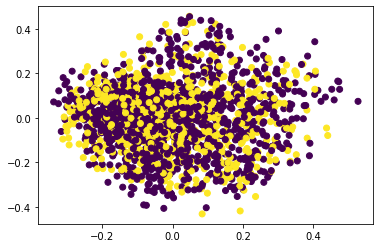

In [149]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(pretrained_bert_embeddings)

pca_df = pd.DataFrame(data=pca_data, columns=("Dim_1", "Dim_2"))
pca_df["labels"] = labels

plt.scatter(pca_df['Dim_1'], pca_df['Dim_2'], c=pca_df['labels'])
plt.show()

In [150]:
from pickle import dump

In [151]:
dump(classifier1, open('Model_new/logistic_bert.pkl','wb'))
dump(model, open('Model_new/model_bert.pkl', 'wb'))

In [152]:
from pickle import load

In [153]:
def predict(tweet):
    
    vocab = load(open('Model_new/model_bert.pkl','rb'))
    classifier1 = load(open('Model_new/logistic_bert.pkl','rb'))
    
   
    
    clean_tweet_vector = vocab.encode([tweet])
    
    print(clean_tweet_vector)
    prediction = classifier1.predict(clean_tweet_vector)
    
    return prediction

In [154]:
q1 = input('Enter the q1: ')
q2 = input('Enter the q2: ')
q1=preprocess(q1,'lem')
q2=preprocess(q2,'lem')
q=q1+q2

print(q)
prediction = predict(q)
if q=="hellohello":
    prediction=1
print(prediction)
if prediction == 0:
    print('not duplicate')
else:
    print('duplicate')

print(prediction)

Enter the q1: india is a @country?
Enter the q2: is india a country**()?
india is a at countryis india a country
[[ 4.02910002e-02  6.97576907e-03 -6.30824864e-02 -1.36883445e-02
   5.22127673e-02 -3.56454216e-02  1.04656354e-01 -6.29565790e-02
   1.70209371e-02  3.22986916e-02  2.93717775e-02 -5.96403591e-02
   8.03523958e-02 -4.21723910e-02  8.78548436e-03 -4.98155318e-02
  -8.27744603e-03 -1.13228085e-02  3.26098390e-02 -7.97115639e-02
   3.38735022e-02  1.62631217e-02 -7.18797557e-03 -2.32104268e-02
   1.53999291e-02 -1.78225413e-02  6.10626340e-02 -3.62441689e-02
  -2.29818225e-02  6.47463724e-02  1.16507988e-02  8.06799978e-02
  -1.36295054e-02  4.20419760e-02 -5.60638942e-02 -2.09468957e-02
  -2.11857148e-02  4.17330153e-02  1.33156851e-01 -6.18511029e-02
   8.14443678e-02 -5.25782071e-02  1.09618187e-01 -1.76709536e-02
  -1.00510214e-02  5.60864024e-02  2.61559915e-02 -3.31301545e-03
   1.88391693e-02 -1.26727782e-02  3.05380356e-02 -1.41735040e-02
  -1.89643018e-02 -5.75738885

# Experiment Tracking for log regression Bert

In [155]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Team7")
    mlflow.set_tag("algo", "Logit_bert")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    C = 0.1
    mlflow.log_param("C", C)
    logistic_bert = LogisticRegression()
    logistic_bert.fit(X_train_bert_pretrained, y_train)
   
    y_test_pred = logistic_bert.predict(X_test_bert_pretrained)
   
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(logistic_bert, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/model_bert.pkl")

# Random forest Bert

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
with mlflow.start_run():
    mlflow.set_tag("dev", "Team7")
    mlflow.set_tag("algo", "rf_bert")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    
    rf_bert = RandomForestClassifier()
    rf_bert.fit(X_train_bert_pretrained,y_train)
    y_pred = rf_bert.predict(X_test_bert_pretrained)
    accuracy_score(y_test,y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(rf_bert, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/model_bert.pkl")

# XGBoost

In [157]:
import numpy
X_train_bert_pretraine = numpy.array(list(X_train.doc_vector_pretrained_bert))
X_test_bert_pretraine = numpy.array(list(X_test.doc_vector_pretrained_bert))

In [158]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_bert_pretraine,y_train)
y_pred1 = xgb.predict(X_test_bert_pretraine)
accuracy_score(y_test,y_pred1)

0.6983333333333334

# Experiment Tracking

In [159]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
with mlflow.start_run():
    mlflow.set_tag("dev", "Team7")
    mlflow.set_tag("algo", "xgboost_bert")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    
    xgboost_bert = XGBClassifier()
    xgboost_bert.fit(X_train_bert_pretraine,y_train)
    y_pred = xgboost_bert.predict(X_test_bert_pretraine)
    accuracy_score(y_test,y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(xgboost_bert, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/model_bert.pkl")

In [160]:
confusion_matrix(y_test,y_pred1)

array([[326,  59],
       [122,  93]])

In [161]:
cm=confusion_matrix(y_test,y_pred1)

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

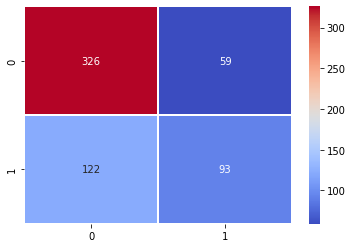

In [165]:
sns.heatmap(cm,cmap='coolwarm', annot=True,linewidth=1,fmt="d")
plt.show()

In [166]:
confusion_matrix(y_test,y_test_pred)

array([[337,  48],
       [121,  94]])

In [167]:
cm1=confusion_matrix(y_test,y_test_pred)

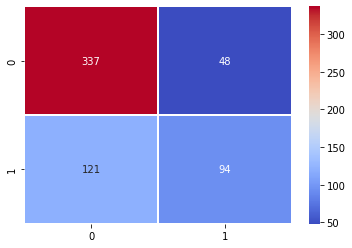

In [168]:
sns.heatmap(cm1,cmap='coolwarm', annot=True,linewidth=1,fmt="d")
plt.show()

# XGboost with hyperparameter tuning

In [33]:
import xgboost as xgb
param_grid = {"max_depth":[x for x in range(2,10)],
              "n_estimators":[50,100,150,200,300,400,500]}

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [171]:
model = RandomizedSearchCV(xgb.XGBClassifier(n_jobs=-1,random_state=25), param_distributions=param_grid,n_iter=30,scoring='neg_log_loss',cv=3,n_jobs=-1)

In [172]:
model.fit(X_train_bert_pretraine,y_train)

RandomizedSearchCV(cv=3, estimator=XGBClassifier(n_jobs=-1, random_state=25),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'n_estimators': [50, 100, 150, 200, 300,
                                                         400, 500]},
                   scoring='neg_log_loss')

In [173]:
model.best_params_

{'n_estimators': 100, 'max_depth': 3}

In [35]:
clf=xgb.XGBClassifier(n_jobs=-1,random_state=25,max_depth=6,n_estimators=50)

In [175]:
clf.fit(X_train_bert_pretraine,y_train)

XGBClassifier(max_depth=6, n_estimators=50, n_jobs=-1, random_state=25)

In [38]:
from sklearn.metrics import log_loss

In [40]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train log loss =  0.16196092571364715  Test log loss =  0.570723448091497


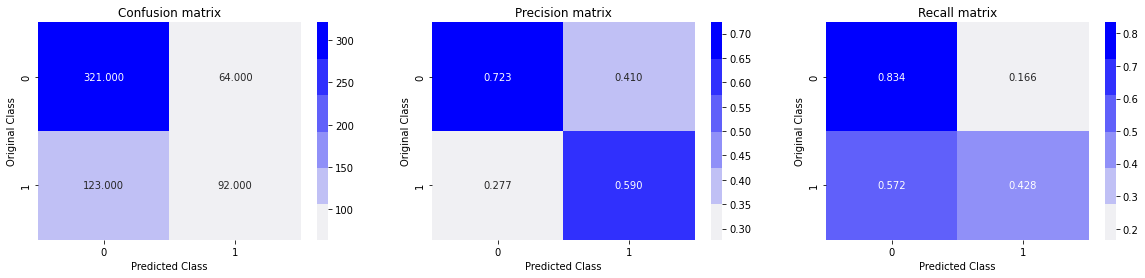

In [178]:
y_pred_test=clf.predict_proba(X_test_bert_pretraine)
y_pred_train=clf.predict_proba(X_train_bert_pretraine)
log_loss_train = log_loss(y_train, y_pred_train, eps=1e-15)
log_loss_test=log_loss(y_test,y_pred_test,eps=1e-15)
print('Train log loss = ',log_loss_train,' Test log loss = ',log_loss_test)
predicted_y=np.argmax(y_pred_test,axis=1)
plot_confusion_matrix(y_test,predicted_y)

In [179]:
#Experiment Tracking with Hyper parameter Tuning of XGBoost

In [180]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
with mlflow.start_run():
    mlflow.set_tag("dev", "Team7")
    mlflow.set_tag("algo", "xgboost_bert_ht")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "train.csv")
    
    #xgboost_bert = XGBClassifier()
    clf.fit(X_train_bert_pretraine,y_train)
    y_pred = clf.predict(X_test_bert_pretraine)
    accuracy_score(y_test,y_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(clf, artifact_path="Model_new")
    mlflow.log_artifact("Model_new/model_bert.pkl")

# BOW

In [181]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df_bow['Clean_q1_lem']) + list(ques_df_bow['Clean_q2_lem'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [182]:
temp_df1_basic = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2_basic = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df_basic = pd.concat([temp_df1_basic, temp_df2_basic], axis=1)
temp_df_basic.shape

(3000, 6000)

In [183]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(3000, 37175)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,7778,7779,7780,7781,7782,7783,7784,7785,7786,7787
0,1,75,76,13,13,12,26,0.46,0.874989,0.874989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,48,56,13,16,8,24,0.33,0.833319,0.714276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,104,119,28,21,4,38,0.11,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,58,145,14,32,1,34,0.03,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,34,49,5,9,3,13,0.23,0.749981,0.499992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [184]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [185]:
clf.fit(X_train,y_train)

XGBClassifier(max_depth=6, n_estimators=50, n_jobs=-1, random_state=25)

Train log loss =  0.33517431861391134  Test log loss =  0.4818196399478863


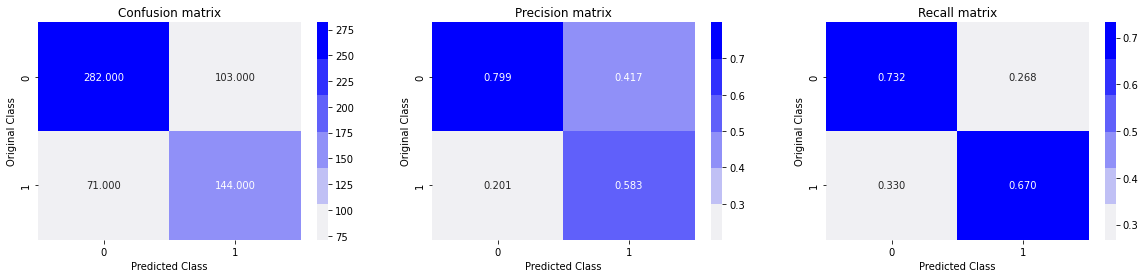

In [186]:
y_pred_test=clf.predict_proba(X_test)
y_pred_train=clf.predict_proba(X_train)
log_loss_train = log_loss(y_train, y_pred_train, eps=1e-15)
log_loss_test=log_loss(y_test,y_pred_test,eps=1e-15)
print('Train log loss = ',log_loss_train,' Test log loss = ',log_loss_test)
predicted_y=np.argmax(y_pred_test,axis=1)
plot_confusion_matrix(y_test,predicted_y)

# TF_IDF

In [24]:
questions = list(ques_df_tfidf['Clean_q1_lem']) + list(ques_df_tfidf['Clean_q2_lem'])

In [27]:
q1_arr, q2_arr = np.vsplit(vectorizer.fit_transform(questions).toarray(),2)

In [28]:
temp_df1_basic = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2_basic = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df_basic = pd.concat([temp_df1_basic, temp_df2_basic], axis=1)
temp_df_basic.shape

(3000, 15576)

In [29]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(3000, 12023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,1,75,76,13,13,12,26,0.46,0.874989,0.874989,...,0,0,0,0,0,0,0,0,0,0
1,0,48,56,13,16,8,24,0.33,0.833319,0.714276,...,0,0,0,0,0,0,0,0,0,0
2,0,104,119,28,21,4,38,0.11,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,0,58,145,14,32,1,34,0.03,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0
4,0,34,49,5,9,3,13,0.23,0.749981,0.499992,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [36]:
clf.fit(X_train,y_train)

XGBClassifier(max_depth=6, n_estimators=50, n_jobs=-1, random_state=25)

Train log loss =  0.3392268315202091  Test log loss =  0.48817785650569323


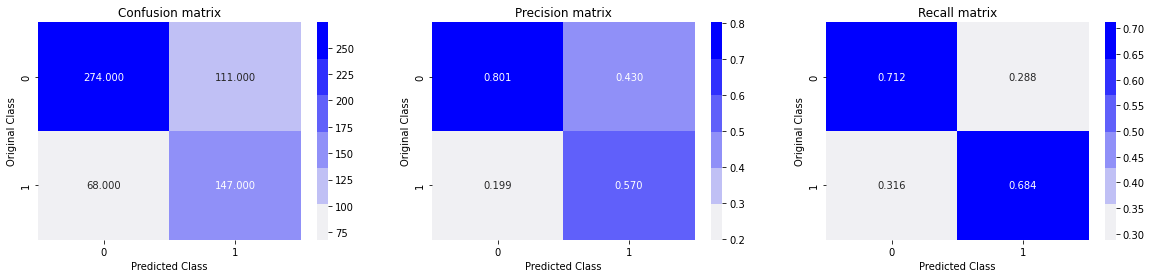

In [47]:
y_pred_test=clf.predict_proba(X_test)
y_pred_train=clf.predict_proba(X_train)
log_loss_train = log_loss(y_train, y_pred_train, eps=1e-15)
log_loss_test=log_loss(y_test,y_pred_test,eps=1e-15)
print('Train log loss = ',log_loss_train,' Test log loss = ',log_loss_test)
predicted_y=np.argmax(y_pred_test,axis=1)
plot_confusion_matrix(y_test,predicted_y)

# W2V

In [78]:
import numpy as np
#print(np.asarray(X).shape)
clf.fit(np.asarray(X_train_w2v),y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(max_depth=6, n_estimators=50, n_jobs=-1, random_state=25)

Train log loss =  0.47141629454058903  Test log loss =  0.6328350107433895


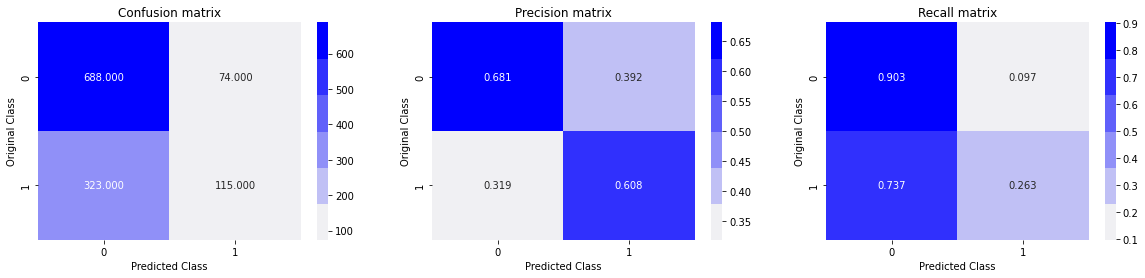

In [79]:
y_pred_test=clf.predict_proba(X_test_w2v)
y_pred_train=clf.predict_proba(X_train_w2v)
log_loss_train = log_loss(y_train, y_pred_train, eps=1e-15)
log_loss_test=log_loss(y_test,y_pred_test,eps=1e-15)
print('Train log loss = ',log_loss_train,' Test log loss = ',log_loss_test)
predicted_y=np.argmax(y_pred_test,axis=1)
plot_confusion_matrix(y_test,predicted_y)

# Glove

In [126]:
clf.fit(np.asarray(X_train_glove_pretrained),y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(max_depth=6, n_estimators=50, n_jobs=-1, random_state=25)

Train log loss =  0.30032256924159206  Test log loss =  0.4142833781987429


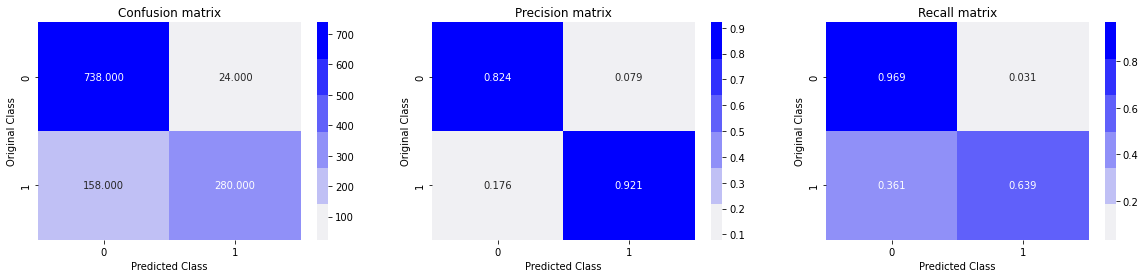

In [127]:
y_pred_test=clf.predict_proba(X_test_glove_pretrained)
y_pred_train=clf.predict_proba(X_train_glove_pretrained)
log_loss_train = log_loss(y_train, y_pred_train, eps=1e-15)
log_loss_test=log_loss(y_test,y_pred_test,eps=1e-15)
print('Train log loss = ',log_loss_train,' Test log loss = ',log_loss_test)
predicted_y=np.argmax(y_pred_test,axis=1)
plot_confusion_matrix(y_test,predicted_y)